In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [480]:
data_mb = []

for year in range(2012,2022):
    # Construct the file path using pathlib
    file_path = Path('data_mb_all_years') / f'{year}.csv'
    csv = pd.read_csv(file_path)
    csv.columns = csv.columns.str.lower()
    
    df = pd.DataFrame()
    
    cols = ['weight', 'nefashot', 'decile','madadpereferia', 'total_net', 'c31']
    
        
    df['mispar_mb'] = csv['misparmb'].astype(str) + '_' + str(year) # מספר משק בית כולל שנת דוח
    df['year'] = year # 
    df[cols] = csv[cols]
    
    rename_cols = {
        'madadpereferia': 'periferia_index',
        'c31': 'fruits_vegtables'
    }
    df.rename(columns=rename_cols, inplace=True)
    
    data_mb.append(df)

In [478]:
mb_df = pd.concat(data_mb)
mb_df

,mispar_mb,year,weight,nefashot,decile,periferia_index,total_net,fruits_vegtables
0,240_2012,2012,294.590424,3,3,1.0,8873,533.0
1,257_2012,2012,205.387970,1,4,1.0,5111,714.0
2,265_2012,2012,162.562012,2,7,1.0,14144,797.0
3,273_2012,2012,163.866348,2,1,1.0,2198,240.0
4,281_2012,2012,289.078003,3,1,1.0,5873,243.0
...,...,...,...,...,...,...,...,...
6052,53760_2021,2021,182.102000,6,10,3.0,60662,272.0
6053,53762_2021,2021,278.277000,7,1,5.0,10443,34.0
6054,58002_2021,2021,604.582000,3,1,4.0,6226,388.0
6055,58031_2021,2021,429.712000,3,3,4.0,12082,316.0


In [479]:
data_food = []

for year in range(2012,2022):
    # Construct the file path using pathlib
    file_path = Path('data_food_all_years') / f'{year}.csv'
    csv = pd.read_csv(file_path)
    csv.columns = csv.columns.str.lower()
    
    df = pd.DataFrame()
    
    df['mispar_mb'] = csv['misparmb'].astype(str) + '_' + str(year) # מספר משק בית כולל שנת דוח
    
    cols_dict = {
        'food_no_fv':'c30', # הוצאה על אוכל ללא פירות וירקות
        'bread':'c300', # הוצאה על לחמים,דגנים ובצקים
        'oils':'c301', # הוצאה על שמנים צמחיים
        'meat_chicken':'c302', # הוצאה על בשר ועופות
        'fish':'c303', # הוצאה על דגים
        'milk_eggs':'c304', # הוצאה על חלב,מוצריו,ביצים
        'sugar':'c305', # הוצאה על סוכרים
        'soda':'c306', # הוצאה על משקאות קלים
        'alcohol':'c307', # הוצאה על אלכוהול
        'out':'c308', # הוצאה על אוכל בחוץ
        'others':'c309' # אחר
    }
    df[list(cols_dict.keys())] = csv[cols_dict.values()]

    data_food.append(df)

In [470]:
food_df = pd.concat(data_food)
food_df

,mispar_mb,food_no_fv,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others
0,42_2012,2267,361,0,425,26,395,57,75,0,477,451
1,59_2012,1688,304,15,394,89,199,320,132,0,0,235
2,67_2012,4512,721,79,933,240,1061,209,0,37,988,246
3,75_2012,1495,244,211,374,136,218,123,57,0,0,132
4,83_2012,5645,490,155,765,0,845,35,0,0,2957,397
...,...,...,...,...,...,...,...,...,...,...,...,...
6052,53760_2021,12599,0,0,0,0,0,0,0,0,0,12599
6053,53762_2021,2163,387,93,705,86,189,27,357,0,0,316
6054,58002_2021,2191,306,0,582,0,565,0,629,0,0,107
6055,58031_2021,966,505,0,0,256,0,84,0,0,0,119


In [481]:
big_df = pd.concat([mb_df.set_index('mispar_mb'), food_df.set_index('mispar_mb')], axis=1, join="inner")
big_df['total_food'] = big_df['fruits_vegtables'] + big_df['food_no_fv']
big_df['fruits_vegtables'].isna().sum()

270

In [472]:
# from funcs import weighted_average

def weighted_average(df, col, weight_col):
    weights = df.loc[col.index, weight_col]
    mask = ~col.isna()  # Create a mask to exclude NaN values
    col = col[mask]
    weights = weights[mask]
    return np.average(col, weights=weights)

def w_avg(col):
    return weighted_average(big_df, col, 'weight')

by_periferia = big_df.groupby(['periferia_index']).agg(w_avg)

index_to_strs = ['Very Periferia','Periferia','Medium','Central','Very Central']

by_periferia.index = index_to_strs

by_periferia

,year,weight,nefashot,decile,total_net,fruits_vegtables,food_no_fv,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,total_food
Very Periferia,2015.794046,419.318576,3.044841,4.827940,15373.634372,486.735904,1896.660375,318.787232,61.336481,363.013819,91.910041,289.887998,77.339311,76.799466,60.005718,346.316561,210.804216,2387.730215
Periferia,2017.369472,481.883111,3.768602,4.394480,16563.835668,605.231169,2358.116629,366.492078,65.064683,657.337082,100.650972,334.054200,95.548319,98.874208,37.529882,341.640666,260.011434,2965.044031
Medium,2016.263557,411.822164,3.393246,4.901641,17082.533759,515.525379,2103.934562,349.689790,54.575173,467.683984,103.717112,330.660506,82.797972,89.244104,49.467617,353.382109,222.123149,2624.901741
Central,2017.271739,449.995760,3.356938,5.794479,20873.101188,527.928257,2143.355597,346.184083,47.849747,426.564421,111.000556,352.312218,80.427373,76.428659,56.311368,399.542698,245.848410,2676.641464
Very Central,2016.611759,480.220553,3.033951,6.071067,20099.872118,499.642694,2019.700685,308.782830,42.055895,343.660403,95.918143,312.634307,73.344504,68.572211,51.856288,474.800333,247.425853,2523.489536


In [474]:
periferia_ready = by_periferia.apply(lambda x: (x / by_periferia['total_food']) * 100)
periferia_ready.drop(columns=['year','decile','nefashot','total_net','food_no_fv','total_food','weight'],inplace=True)
periferia_ready['sum'] = periferia_ready.iloc[:,:].sum(axis=1)

# הבדלי צריכת מזון בין פריפריה למרכז
# ניתן לראות את הפערים בצריכת מזון מחוץ לבית (משמעותית יותר בקרב ערים מרכזיות יותר)
# ניתן לראות את הפערים בצריכת עוף ובשר
periferia_ready

,fruits_vegtables,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,sum
Very Periferia,20.384879,13.351057,2.568820,15.203301,3.849264,12.140735,3.239031,3.216421,2.513086,14.504007,8.828645,99.799246
Periferia,20.412215,12.360426,2.194392,22.169556,3.394586,11.266416,3.222492,3.334662,1.265745,11.522280,8.769227,99.911997
Medium,19.639797,13.322014,2.079132,17.817200,3.951276,12.597062,3.154327,3.399903,1.884551,13.462680,8.462151,99.770092
Central,19.723533,12.933525,1.787679,15.936554,4.147009,13.162473,3.004787,2.855394,2.103807,14.927016,9.184959,99.766735
Very Central,19.799674,12.236343,1.666577,13.618460,3.801012,12.388968,2.906471,2.717357,2.054944,18.815229,9.804909,99.809943


Text(0, 0.5, 'Percentage from total food')

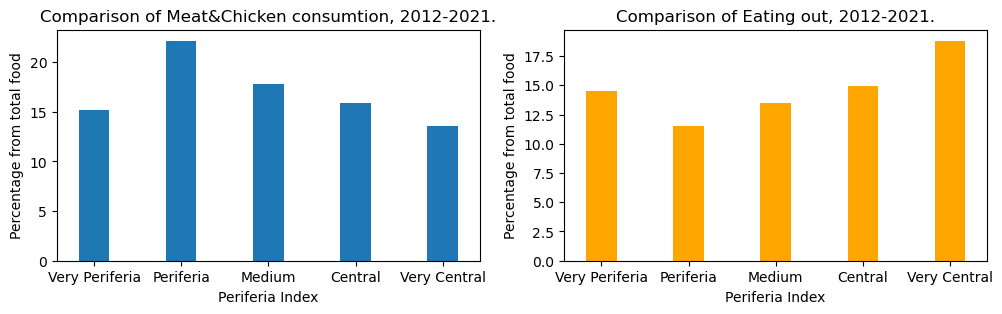

In [475]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

width = 0.35  # Width of the bars
periferia_ready['meat_chicken'].plot(kind='bar', width=width, label='Meat&Chicken', ax=ax[0], rot=0)

ax[0].set_title('Comparison of Meat&Chicken consumtion, 2012-2021.')
ax[0].set_xlabel('Periferia Index')
ax[0].set_ylabel('Percentage from total food')

periferia_ready['out'].plot(kind='bar', width=width, label='Out', ax=ax[1], color='orange', rot=0)
ax[1].set_title('Comparison of Eating out, 2012-2021.')
ax[1].set_xlabel('Periferia Index')
ax[1].set_ylabel('Percentage from total food')